In [1]:
import f3dasm
import numpy as np

In [2]:
dim = 2
i = 50
r = 1
bounds = np.array([[0.0,1.0], [0.0,1.]])
hyperparameters={}

design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensions=dim)

func = f3dasm.functions.Brown(dimensionality=dim, noise=False, scale_bounds=bounds)
# func.offset = np.atleast_2d(np.zeros(func.dimensionality))

data = f3dasm.Data(designspace=design)
optimizer = f3dasm.optimization.CMAES(data=data, hyperparameters=hyperparameters)
sampler = f3dasm.sampling.LatinHypercubeSampling(doe=design)


all_data = f3dasm.run_multiple_realizations(optimizer=optimizer, 
function=func,
sampler=sampler,
iterations=i,
realizations=r
)



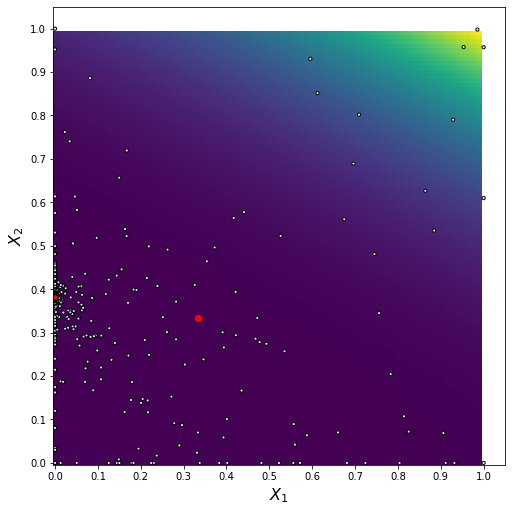

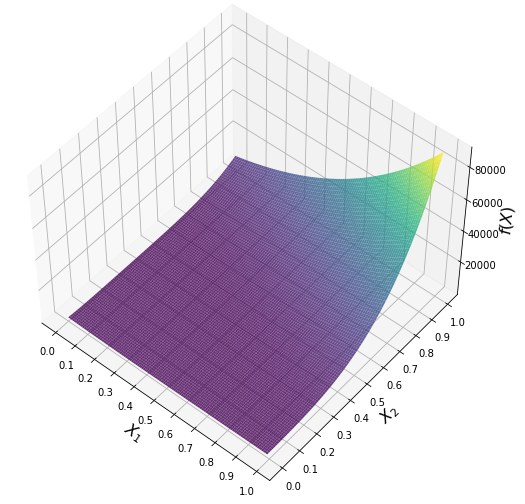

In [3]:
if dim == 2:
    fig, ax = func.plot_data(all_data[0], px=100, domain=bounds)
    ax.scatter(func.get_global_minimum(dim)[0][0],func.get_global_minimum(dim)[0][1], s=40, c='r')
    #ax.scatter(-3.19468541,0.89682456, s=40, c='g')
    func.plot(px=100, domain=bounds)

In [4]:
all_data[0].data['input']

,x0,x1
0,8.142741e-01,0.107296
1,9.289520e-01,0.790207
2,3.311506e-01,0.023577
3,3.541034e-01,0.464056
4,1.498256e-01,0.656795
...,...,...
1525,7.041629e-09,0.382218
1526,3.174925e-10,0.382220
1527,0.000000e+00,0.382223
1528,6.318236e-09,0.382220


In [5]:
func.scale_bounds, func.input_domain

(array([[0., 1.],
        [0., 1.]]),
 array([[-5, 10],
        [-5, 10]]))

In [6]:
import pandas as pd
mean_y = pd.concat([d.get_output_data() for d in all_data], axis=1).mean(axis=1)
std_y = pd.concat([d.get_output_data() for d in all_data], axis=1).std(axis=1)
mean_y

0         295.449779
1       34931.319852
2         135.012093
3         466.150266
4        1183.813048
            ...     
1525        8.688323
1526        8.688323
1527        8.688323
1528        8.688323
1529        8.688323
Length: 1530, dtype: float64

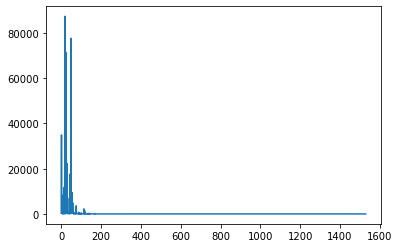

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.figure(), plt.axes()
ax.plot(mean_y)
ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, color='b', alpha=.1)
#ax.set_yscale('log')
fig.show()

In [8]:
func.get_global_minimum(2)

(array([0.33333333, 0.33333333]), array([[96.08124876]]))

In [9]:
func.descale_input(np.array([0.0,0.0]))
x = np.array([[0.0,0.0]])

In [10]:
func.input_domain

array([[-5, 10],
       [-5, 10]])

In [11]:
(func.input_domain[:, 1] - func.input_domain[:, 0]) * x + func.input_domain[:, 0]

array([[-5., -5.]])

In [12]:
(x - func.input_domain[:, 0]) / (func.input_domain[:, 1] - func.input_domain[:, 0])

array([[0.33333333, 0.33333333]])

In [13]:
x

array([[0., 0.]])

In [14]:
func.input_domain[:, 0]

array([-5, -5])

In [15]:
x - func.input_domain[:, 0]

array([[5., 5.]])

In [16]:
(func.input_domain[:, 1] - func.input_domain[:, 0])

array([15, 15])

In [17]:
o = np.array([[0.9,0.3]])
o

array([[0.9, 0.3]])

In [18]:
func.scale_input(func.descale_input(o))

array([[0.9, 0.3]])

In [19]:
func.descale_input(func.scale_input(o))
o

array([[0.9, 0.3]])

In [20]:
scale_bounds = [-3., 1.]

In [21]:
o = np.random.uniform(low=scale_bounds[0], high=scale_bounds[1], size=(1, func.dimensionality))
x = o
x

array([[-0.08030024, -1.25239234]])

In [22]:
(func.input_domain[:, 1] - func.input_domain[:, 0])

array([15, 15])

In [23]:
(x - func.scale_bounds[:, 0]) / (func.scale_bounds[:, 1] - func.scale_bounds[0])

array([[-0.08030024,        -inf]])

In [24]:
func.offset

array([[ 0.51721336, -0.10510876]])

In [25]:
func.get_global_minimum(2)[0]

array([0.33333333, 0.33333333])

In [26]:
(func.scale_bounds[:, 1] - func.scale_bounds[0])

array([1., 0.])